In [1]:
!nvidia-smi

Sat Sep 20 16:02:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

In [26]:
# !pip install -q supervision
!pip install --upgrade supervision

In [23]:
!pip install -q roboflow

In [24]:
!pip uninstall -y wandb

In [8]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt


In [9]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh {HOME}/data

total 104K
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg


In [13]:
!pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.4/563.4 kB 12.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.22.2
    Uninstalling huggingface-hub-0.22.2:
      Successfully uninstalled huggingface-hub-0.22.2


In [14]:
!pip show ultralytics huggingface_hub

Name: ultralytics
Version: 8.1.34
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: Glenn Jocher, Ayush Chaurasia, Jing Qiu
Author-email: 
License: AGPL-3.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: matplotlib, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, thop, torch, torchvision, tqdm
Required-by: 
---
Name: huggingface-hub
Version: 0.35.0
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /opt/conda/lib/python3.10/site-packages
Requires: filelock, fsspec, hf-xet, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, datasets, timm, tokenizers, transformers


In [15]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

/kaggle/working
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /kaggle/working/data/dog.jpeg: 640x384 1 person, 1 dog, 79.5ms
Speed: 4.7ms preprocess, 79.5ms inference, 200.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


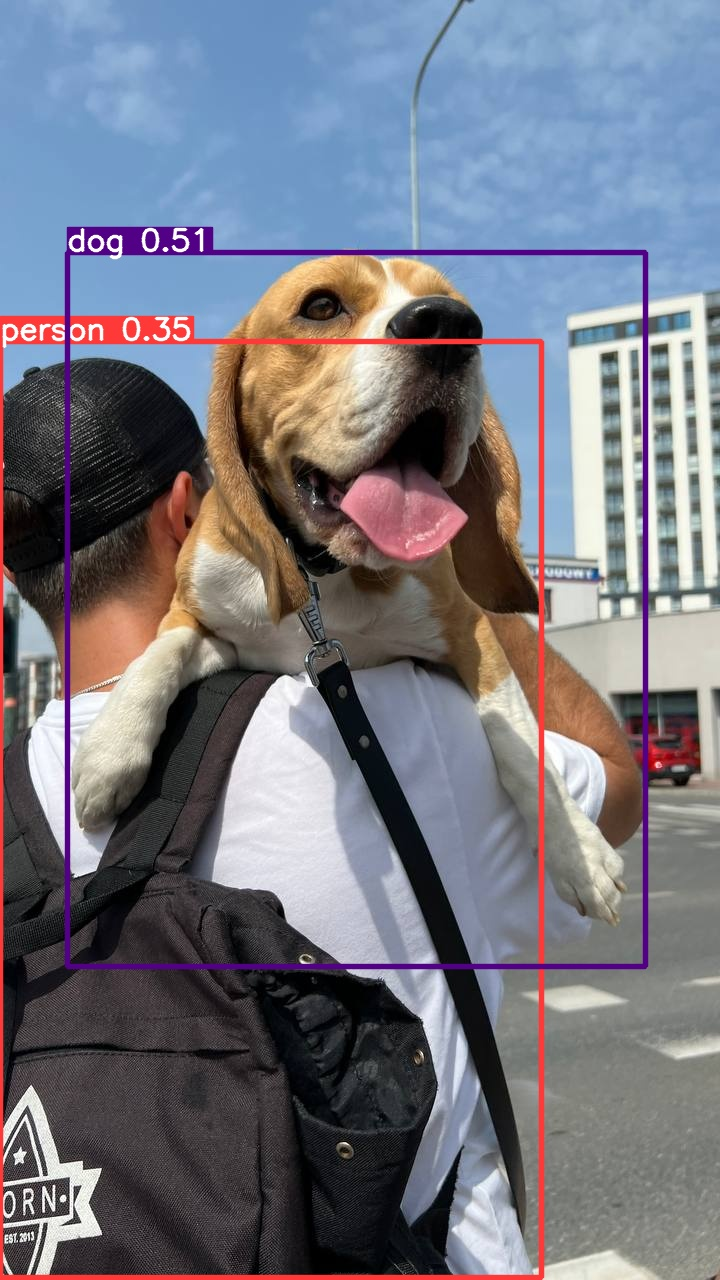

In [16]:
%cd {HOME}

from IPython.display import Image

Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [17]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/data/dog.jpeg', conf=0.25)


image 1/1 /kaggle/working/data/dog.jpeg: 640x384 1 person, 1 dog, 73.1ms
Speed: 4.0ms preprocess, 73.1ms inference, 129.5ms postprocess per image at shape (1, 3, 640, 384)


In [18]:
results[0].boxes.xyxy

tensor([[6.7041e+01, 2.5264e+02, 6.4549e+02, 9.6621e+02],
        [7.4646e-01, 3.4156e+02, 5.4170e+02, 1.2773e+03]], device='cuda:0')

In [19]:
results[0].boxes.conf

tensor([0.5090, 0.3536], device='cuda:0')

In [20]:
results[0].boxes.cls

tensor([16.,  0.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

rf = Roboflow(api_key="n12mRmQdWmrjCSKFgJMC")
project = rf.workspace("waste-detections-by-fu").project("waste-detections-c0mkz")
version = project.version(6)
dataset = version.download("yolov8")


/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Waste-Detections-6 in yolov8:: 100%|██████████| 14224/14224 [00:02<00:00, 5844.80it/s]


In [29]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [30]:
!cat {dataset.location}/data.yaml

names:
- Paper
- Plastic Bottle
- Plastic bag
- Plastic waste
nc: 4
roboflow:
  license: CC BY 4.0
  project: waste-detections-c0mkz
  url: https://universe.roboflow.com/waste-detections-by-fu/waste-detections-c0mkz/dataset/6
  version: 6
test: ../test/images
train: ../train/images
val: ../valid/images


In [31]:
dataset.location

'/kaggle/working/datasets/Waste-Detections-6'

In [43]:
!du -sh {dataset.location}/train/images  # Original
!du -sh /kaggle/working/compressed_images  # Compressed

556M	/kaggle/working/datasets/Waste-Detections-6/train/images
4.0K	/kaggle/working/compressed_images


In [38]:
# !pip install --upgrade pillow

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=50 batch=32 plots=True device=0,1 \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

In [45]:
print(model.train.__defaults__)  # View default training parameters

(None,)


In [52]:
from PIL import Image


In [46]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch8000.jpg
R_curve.png					   train_batch8001.jpg
args.yaml					   train_batch8002.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1758386530.af9808613227.301.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


In [ ]:
%cd {HOME}
Image.open(f'{HOME}/runs/detect/train/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image.open(f'{HOME}/runs/detect/train/results.png')

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
! zip -r yolov10n_recyclablewaste.zip {HOME}/runs/

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")